In [79]:
import pandas as pd;
import numpy as np;
from keras import models,layers;
from sklearn import preprocessing

df=pd.read_csv("GOOG.csv");
test=df["Date"][0];
years=np.empty(len(df["Date"]),dtype="int")
months=np.empty(len(df["Date"]),dtype="int")
days=np.empty(len(df["Date"]),dtype="int")
for i in range(len(df["Date"])):
    array=df["Date"][i].split("-");
    years[i]=array[0];
    months[i]=array[1];
    days[i]=array[2];
df["year"]=years;
df["month"]=months;
df["day"]=days;

x=df[["year","month","day"]];
y=df["Close"]
x=np.array(x);
y=np.array(y);
min_max_scaler=preprocessing.MinMaxScaler();
x=min_max_scaler.fit_transform(x);
x=x[indices];
y=y[indices];
training_x=x[:round(len(x)*.90)];
training_y=y[:round(len(y)*.90)];
cv_x=x[round(len(x)*.90):round(len(x)*.95)];
cv_y=y[round(len(y)*.90):round(len(x)*.95)];
test_x=x[round(len(x)*.95):]
test_y=y[round(len(y)*.95):]
                               

In [68]:
network=models.Sequential();
network.add(layers.Dense(160,activation=layers.LeakyReLU(alpha=0.3),input_shape=(3,)));
network.add(layers.Dense(160,activation=layers.LeakyReLU(alpha=0.3)));
network.add(layers.Dense(160,activation=layers.LeakyReLU(alpha=0.3)));
network.add(layers.Dense(1));
network.compile(optimizer="rmsprop",loss="mse",metrics=["mae"]);
history=network.fit(training_x,training_y,epochs=42,batch_size=1,validation_data=(cv_x,cv_y));

Train on 3082 samples, validate on 171 samples
Epoch 1/42
3082/3082 [==============================] - 6s 2ms/step - loss: 27945.9429 - mean_absolute_error: 119.2552 - val_loss: 17314.2536 - val_mean_absolute_error: 102.8670
Epoch 2/42
3082/3082 [==============================] - 6s 2ms/step - loss: 19764.9373 - mean_absolute_error: 106.4632 - val_loss: 19013.0027 - val_mean_absolute_error: 108.6323
Epoch 3/42
3082/3082 [==============================] - 6s 2ms/step - loss: 19650.4298 - mean_absolute_error: 106.1550 - val_loss: 18761.5254 - val_mean_absolute_error: 111.2520
Epoch 4/42
3082/3082 [==============================] - 5s 2ms/step - loss: 19645.6892 - mean_absolute_error: 106.5150 - val_loss: 14964.3674 - val_mean_absolute_error: 95.6917
Epoch 5/42
3082/3082 [==============================] - 6s 2ms/step - loss: 19609.9366 - mean_absolute_error: 106.2229 - val_loss: 14975.6125 - val_mean_absolute_error: 97.3800
Epoch 6/42
3082/3082 [==============================] - 5s 2ms/st

597.0226 574.6554479532164


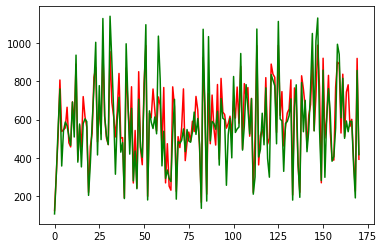

In [76]:
from matplotlib import pyplot as plt

points=network.predict(cv_x);
plt.plot(points,color="red");
plt.plot(cv_y,color="green");
print(np.mean(points),np.mean(cv_y));
plt.show();



[[0.14285714 0.27272727 0.66666667]
 [0.5        1.         0.2       ]
 [0.         0.90909091 0.96666667]
 [0.92857143 0.72727273 0.        ]
 [0.64285714 0.63636364 0.86666667]
 [0.92857143 0.81818182 0.06666667]
 [0.92857143 1.         0.66666667]
 [0.64285714 0.         0.3       ]
 [0.35714286 0.45454545 0.33333333]
 [0.42857143 0.90909091 0.3       ]
 [0.28571429 0.27272727 0.76666667]
 [0.14285714 0.27272727 0.3       ]
 [0.21428571 0.27272727 0.56666667]
 [0.92857143 0.27272727 0.53333333]
 [0.5        0.09090909 0.46666667]
 [0.14285714 0.09090909 0.4       ]
 [0.71428571 1.         0.53333333]
 [0.71428571 0.72727273 0.46666667]
 [0.64285714 0.09090909 0.2       ]
 [0.42857143 0.90909091 0.36666667]
 [0.71428571 0.45454545 0.73333333]
 [0.78571429 0.36363636 0.33333333]
 [0.42857143 0.18181818 0.46666667]
 [0.71428571 0.90909091 0.33333333]
 [0.28571429 0.27272727 0.3       ]
 [0.42857143 0.54545455 0.2       ]
 [0.21428571 0.54545455 0.8       ]
 [0.14285714 0.72727273 0.13

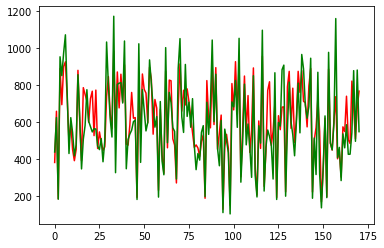

In [80]:
print(test_x);
points=network.predict(test_x);
plt.plot(points,color="red");
plt.plot(test_y,color="green");
plt.show();